In [3]:
pip install pandas numpy matplotlib seaborn nltk scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [27]:
!pip install wordcloud

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import os

from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

In [31]:
# Paths
csv_files = [
    "/Users/ayushigupta/Library/CloudStorage/OneDrive-Personal/projects/shopping app reviews/SentimentAnalysis_ShopingAppReview_AG_17-12-2024/Data/csv/Alibaba.csv",
    "/Users/ayushigupta/Library/CloudStorage/OneDrive-Personal/projects/shopping app reviews/SentimentAnalysis_ShopingAppReview_AG_17-12-2024/Data/csv/Aliexpress.csv",
    "/Users/ayushigupta/Library/CloudStorage/OneDrive-Personal/projects/shopping app reviews/SentimentAnalysis_ShopingAppReview_AG_17-12-2024/Data/csv/Myntra.csv",
    "/Users/ayushigupta/Library/CloudStorage/OneDrive-Personal/projects/shopping app reviews/SentimentAnalysis_ShopingAppReview_AG_17-12-2024/Data/csv/Flipkart.csv",
    "/Users/ayushigupta/Library/CloudStorage/OneDrive-Personal/projects/shopping app reviews/SentimentAnalysis_ShopingAppReview_AG_17-12-2024/Data/csv/Meesho.csv",
    "/Users/ayushigupta/Library/CloudStorage/OneDrive-Personal/projects/shopping app reviews/SentimentAnalysis_ShopingAppReview_AG_17-12-2024/Data/csv/Lazada.csv",
    "/Users/ayushigupta/Library/CloudStorage/OneDrive-Personal/projects/shopping app reviews/SentimentAnalysis_ShopingAppReview_AG_17-12-2024/Data/csv/Amazon shopping.csv",
    "/Users/ayushigupta/Library/CloudStorage/OneDrive-Personal/projects/shopping app reviews/SentimentAnalysis_ShopingAppReview_AG_17-12-2024/Data/csv/Snapdeal.csv",
    "/Users/ayushigupta/Library/CloudStorage/OneDrive-Personal/projects/shopping app reviews/SentimentAnalysis_ShopingAppReview_AG_17-12-2024/Data/csv/Shein.csv",
    "/Users/ayushigupta/Library/CloudStorage/OneDrive-Personal/projects/shopping app reviews/SentimentAnalysis_ShopingAppReview_AG_17-12-2024/Data/csv/Daraz Online Shopping App.csv",
    "/Users/ayushigupta/Library/CloudStorage/OneDrive-Personal/projects/shopping app reviews/SentimentAnalysis_ShopingAppReview_AG_17-12-2024/Data/csv/Walmart.csv"
]
json_files = [
    "/Users/ayushigupta/Library/CloudStorage/OneDrive-Personal/projects/shopping app reviews/SentimentAnalysis_ShopingAppReview_AG_17-12-2024/Data/json/Alibaba.json",
    "/Users/ayushigupta/Library/CloudStorage/OneDrive-Personal/projects/shopping app reviews/SentimentAnalysis_ShopingAppReview_AG_17-12-2024/Data/json/Aliexpress.json",
    "/Users/ayushigupta/Library/CloudStorage/OneDrive-Personal/projects/shopping app reviews/SentimentAnalysis_ShopingAppReview_AG_17-12-2024/Data/json/Daraz Online Shopping App.json",
    "/Users/ayushigupta/Library/CloudStorage/OneDrive-Personal/projects/shopping app reviews/SentimentAnalysis_ShopingAppReview_AG_17-12-2024/Data/json/Myntra.json",
    "/Users/ayushigupta/Library/CloudStorage/OneDrive-Personal/projects/shopping app reviews/SentimentAnalysis_ShopingAppReview_AG_17-12-2024/Data/json/Lazada.json",
    "/Users/ayushigupta/Library/CloudStorage/OneDrive-Personal/projects/shopping app reviews/SentimentAnalysis_ShopingAppReview_AG_17-12-2024/Data/json/Amazon shopping.json",
    "/Users/ayushigupta/Library/CloudStorage/OneDrive-Personal/projects/shopping app reviews/SentimentAnalysis_ShopingAppReview_AG_17-12-2024/Data/json/Flipkart.json",
    "/Users/ayushigupta/Library/CloudStorage/OneDrive-Personal/projects/shopping app reviews/SentimentAnalysis_ShopingAppReview_AG_17-12-2024/Data/json/Meesho.json",
    "/Users/ayushigupta/Library/CloudStorage/OneDrive-Personal/projects/shopping app reviews/SentimentAnalysis_ShopingAppReview_AG_17-12-2024/Data/json/Walmart.json",
    "/Users/ayushigupta/Library/CloudStorage/OneDrive-Personal/projects/shopping app reviews/SentimentAnalysis_ShopingAppReview_AG_17-12-2024/Data/json/Shein.json",
    "/Users/ayushigupta/Library/CloudStorage/OneDrive-Personal/projects/shopping app reviews/SentimentAnalysis_ShopingAppReview_AG_17-12-2024/Data/json/Snapdeal.json"
]

# Load CSV
csv_data = {os.path.basename(f).split('.')[0]: pd.read_csv(f) for f in csv_files}

# Load JSON
json_data = {}
for f in json_files:
    with open(f, 'r') as file:
        json_data[os.path.basename(f).split('.')[0]] = pd.json_normalize(json.load(file))

In [33]:
csv_data["Alibaba"].head()

reviewId  \
0  275f465b-a58b-439e-ae7c-f9f6dcf2634d   
1  e6c13852-277e-451a-b8d5-dd92aea75402   
2  254b3705-c54b-4ce4-8982-5b468d38231d   
3  c83c1e64-6aa3-42e8-9a56-0385a297b87b   
4  7a65dce8-3f09-4e4e-a263-55efebc13c65   

                                             content  score  thumbsUpCount  \
0  Trying to use the on website is almost impossi...      1             39   
1  Had to uninstall due to the amount of notifica...      3             60   
2  I order and it takes too long the shpping days...      1              7   
3  Buyer beware! They have tons of listings that ...      1           2301   
4  It's all around a great app except for the fac...      4           1859   

              at                                       replyContent  \
0  1720995717000  Hi, we are sorry to hear that. Do share additi...   
1  1720501958000  Hi, we are sorry to hear that. Do share additi...   
2  1721866371000                                                NaN   
3  1611569460000                                                NaN   
4  1545438323000  Thanks for your feedback. Could you tell us mo...   

      repliedAt  appName  
0  1.721048e+12  Alibaba  
1  1.721051e+12  Alibaba  
2           NaN  Alibaba  
3           NaN  Alibaba  
4  1.515586e+12  Alibaba

In [35]:
# Load CSV files into DataFrame
csv_data = [pd.read_csv(file) for file in csv_files]

# Load JSON files into DataFrame
json_data = [pd.DataFrame(json.load(open(file))) for file in json_files]

# Combine CSV and JSON data
combined_df = pd.concat(csv_data + json_data, ignore_index=True)

In [39]:
!pip install missingno

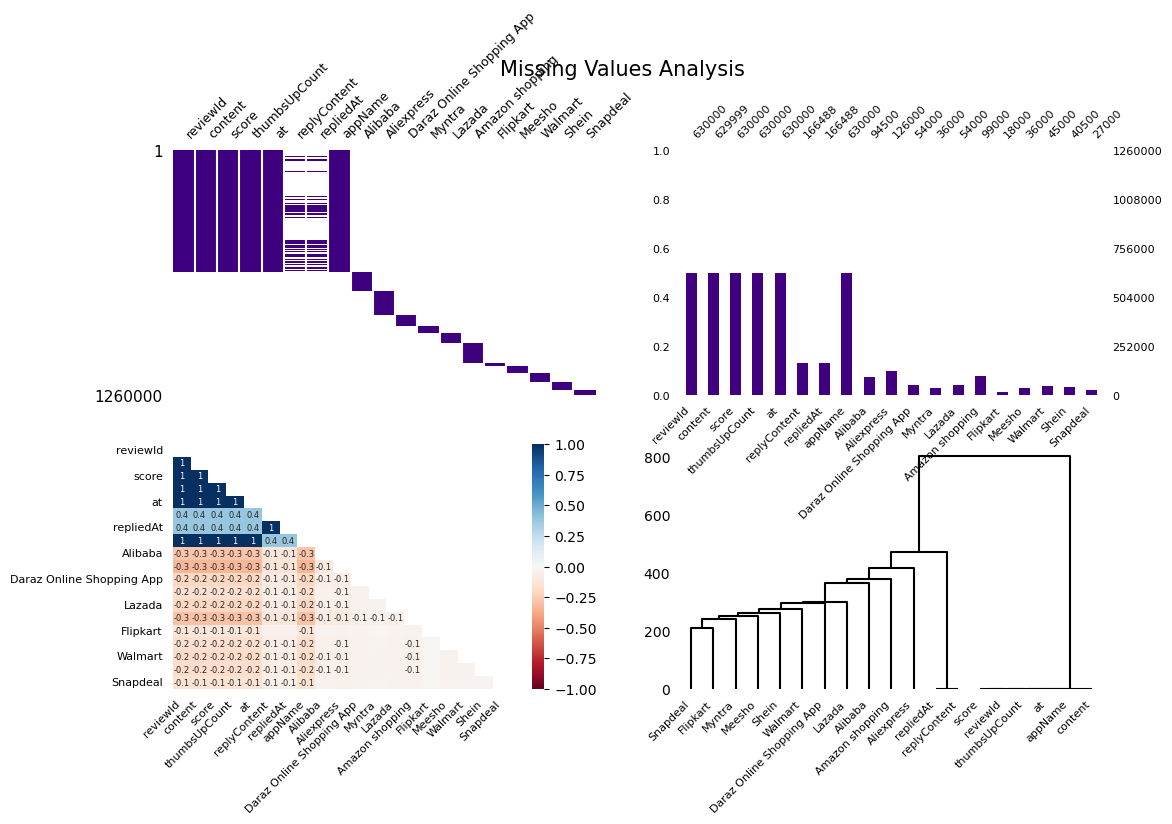

In [41]:
import missingno as msno

fig, ax = plt.subplots(2,2,figsize=(12,7))
axs = np.ravel(ax)
msno.matrix(combined_df,  fontsize=9, color=(0.25,0,0.5),ax=axs[0]);
msno.bar(combined_df, fontsize=8, color=(0.25,0,0.5), ax=axs[1]);
msno.heatmap(combined_df,fontsize=8,ax=axs[2]);
msno.dendrogram(combined_df,fontsize=8,ax=axs[3], orientation='top')

fig.suptitle('Missing Values Analysis', y=1.01, fontsize=15)

# Save the plot
plt.savefig('missing_values_analysis.png')

# Show the plot
plt.show()

DATA CLEANING

In [43]:
print(combined_df.columns)


Index(['reviewId', 'content', 'score', 'thumbsUpCount', 'at', 'replyContent',
       'repliedAt', 'appName', 'Alibaba', 'Aliexpress',
       'Daraz Online Shopping App', 'Myntra', 'Lazada', 'Amazon shopping',
       'Flipkart', 'Meesho', 'Walmart', 'Shein', 'Snapdeal'],
      dtype='object')


In [45]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260000 entries, 0 to 1259999
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   reviewId                   630000 non-null  object 
 1   content                    629999 non-null  object 
 2   score                      630000 non-null  float64
 3   thumbsUpCount              630000 non-null  float64
 4   at                         630000 non-null  float64
 5   replyContent               166488 non-null  object 
 6   repliedAt                  166488 non-null  float64
 7   appName                    630000 non-null  object 
 8   Alibaba                    94500 non-null   object 
 9   Aliexpress                 126000 non-null  object 
 10  Daraz Online Shopping App  54000 non-null   object 
 11  Myntra                     36000 non-null   object 
 12  Lazada                     54000 non-null   object 
 13  Amazon shopping            

In [47]:
print(combined_df.isnull().sum())

reviewId                      630000
content                       630001
score                         630000
thumbsUpCount                 630000
at                            630000
replyContent                 1093512
repliedAt                    1093512
appName                       630000
Alibaba                      1165500
Aliexpress                   1134000
Daraz Online Shopping App    1206000
Myntra                       1224000
Lazada                       1206000
Amazon shopping              1161000
Flipkart                     1242000
Meesho                       1224000
Walmart                      1215000
Shein                        1219500
Snapdeal                     1233000
dtype: int64


In [49]:
# Drop rows where reviews or ratings are missing
combined_df = combined_df.dropna(subset=['content', 'score'])

# Verify the result
print(combined_df.isnull().sum())

reviewId                          0
content                           0
score                             0
thumbsUpCount                     0
at                                0
replyContent                 463511
repliedAt                    463511
appName                           0
Alibaba                      629999
Aliexpress                   629999
Daraz Online Shopping App    629999
Myntra                       629999
Lazada                       629999
Amazon shopping              629999
Flipkart                     629999
Meesho                       629999
Walmart                      629999
Shein                        629999
Snapdeal                     629999
dtype: int64


In [51]:
# Ensure 'score' is treated as a categorical variable
combined_df['score'] = combined_df['score'].astype(int)

# Preview the data
combined_df[['appName', 'score']].head()

appName  score
0  Alibaba      1
1  Alibaba      3
2  Alibaba      1
3  Alibaba      1
4  Alibaba      4

Exploratory Data Analysis (EDA)📊

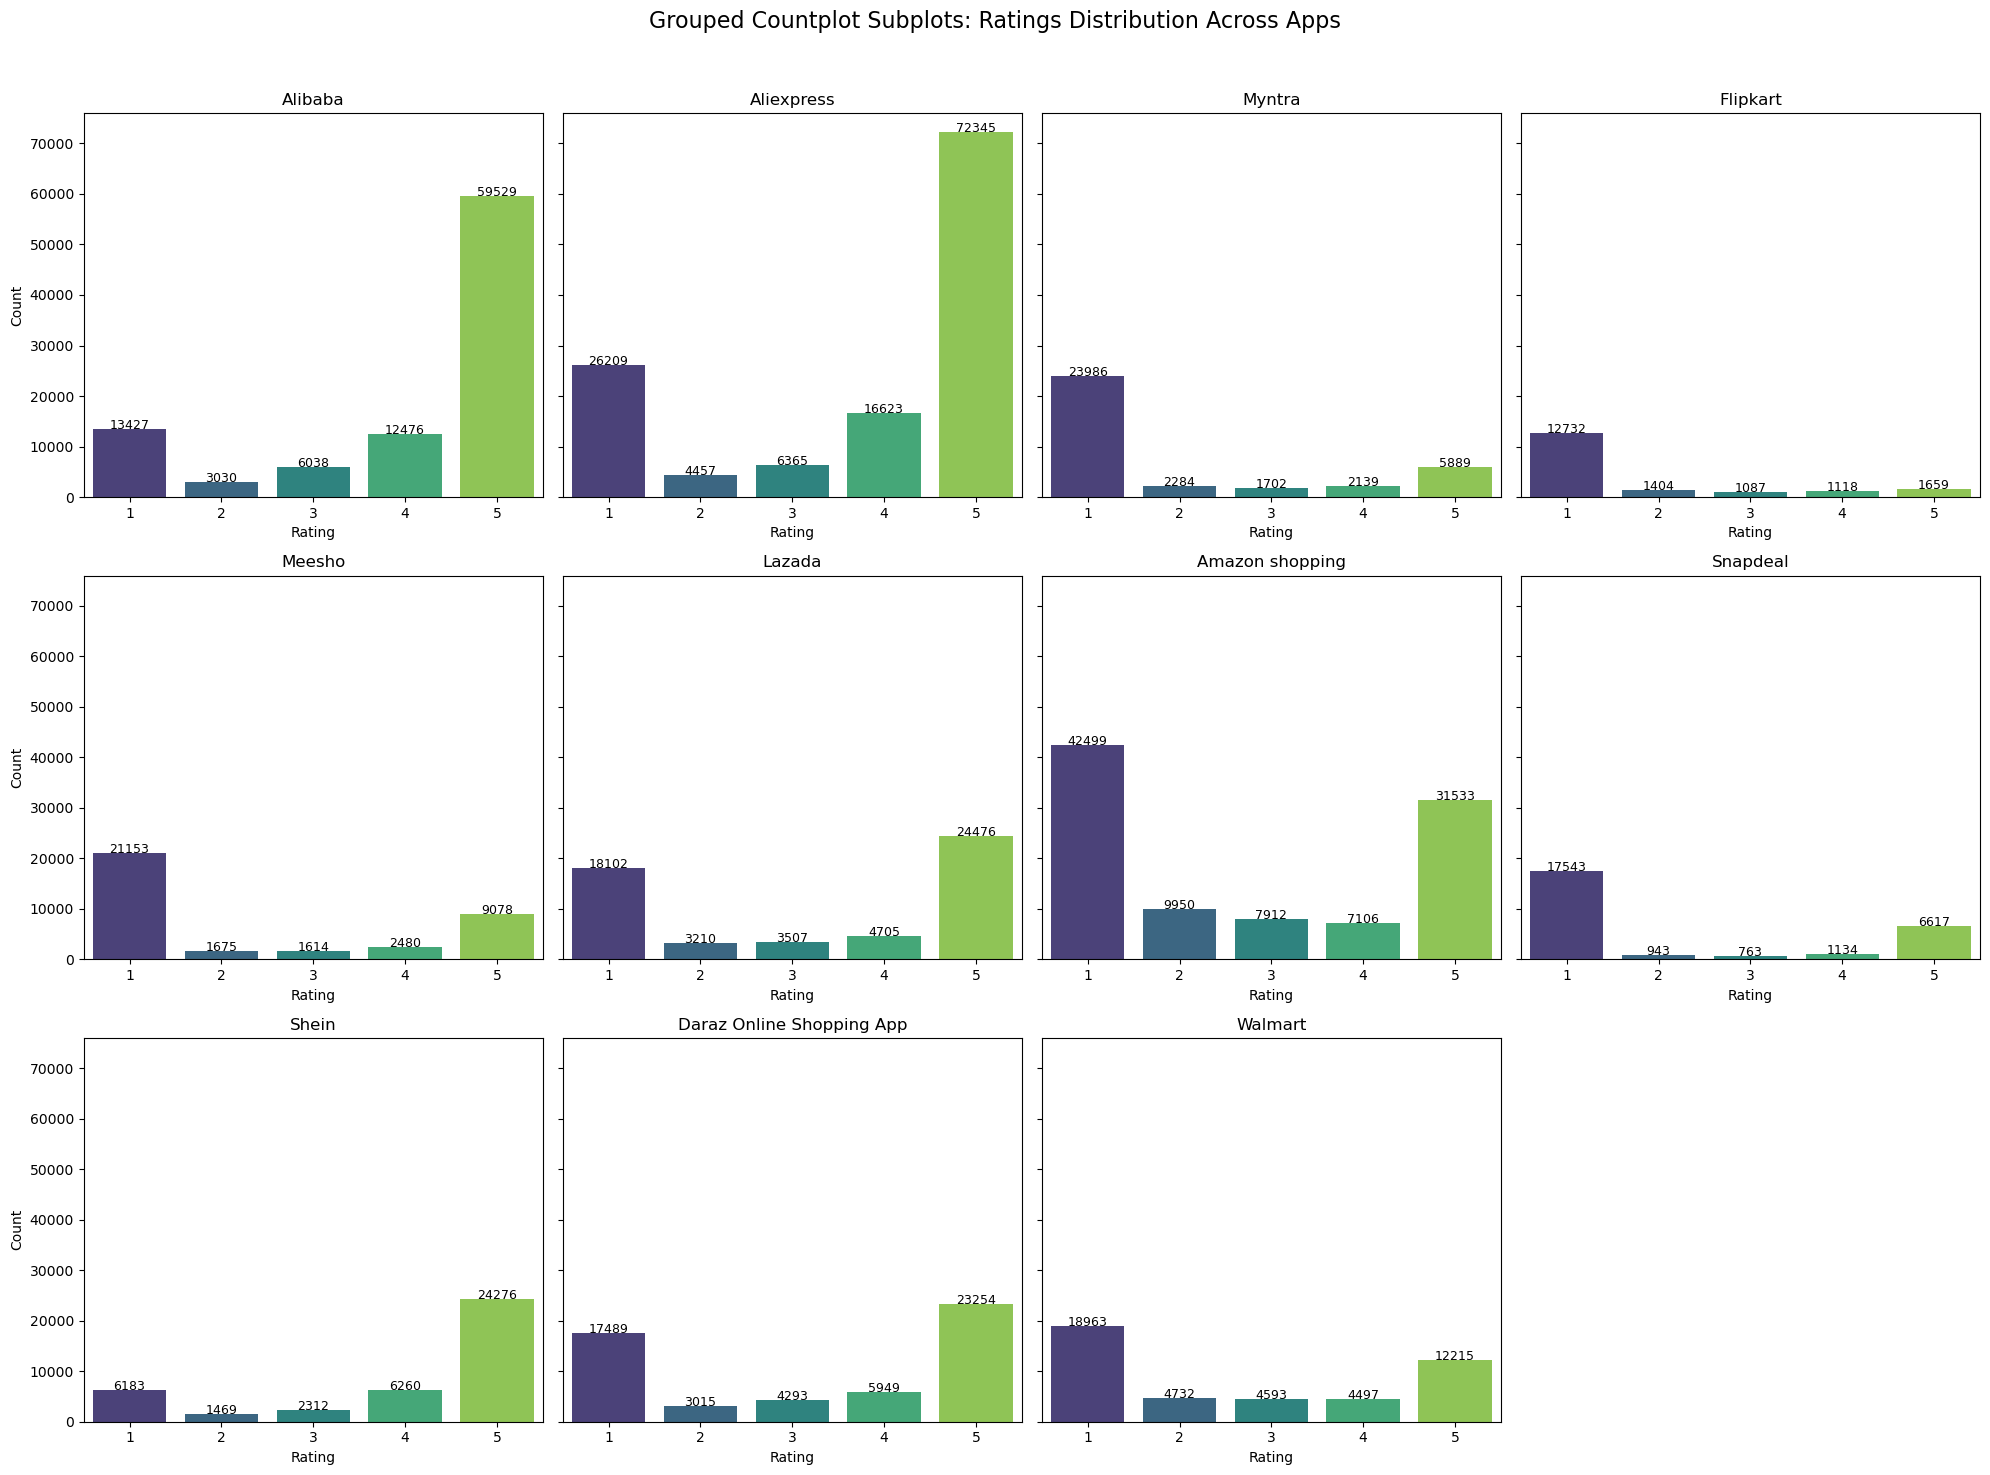

In [53]:
# Get a list of unique apps
apps = combined_df['appName'].unique()

# Define the subplot grid (e.g., 3 rows x 4 columns)
rows, cols = 3, 4
fig, axes = plt.subplots(rows, cols, figsize=(20, 15), sharey=True)
axes = axes.flatten()

# Plot countplots for each app
for i, app in enumerate(apps):
    ax = axes[i]
    app_data = combined_df[combined_df['appName'] == app]
    
    sns.countplot(
        data=app_data, 
        x='score', 
        ax=ax, 
        palette='viridis', 
        order=sorted(app_data['score'].unique())
    )
    ax.set_title(app, fontsize=12)
    ax.set_xlabel('Rating', fontsize=10)
    ax.set_ylabel('Count', fontsize=10)
    
    # Annotate bar heights
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Only annotate bars with a height greater than 0
            ax.text(
                p.get_x() + p.get_width() / 2.,
                height + 1,
                f'{int(height)}',
                ha='center',
                fontsize=9
            )

# Remove unused subplots (if any apps < rows*cols)
for j in range(len(apps), len(axes)):
    fig.delaxes(axes[j])

# Add a global title
plt.suptitle('Grouped Countplot Subplots: Ratings Distribution Across Apps', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Analyze the Best-Performing Apps

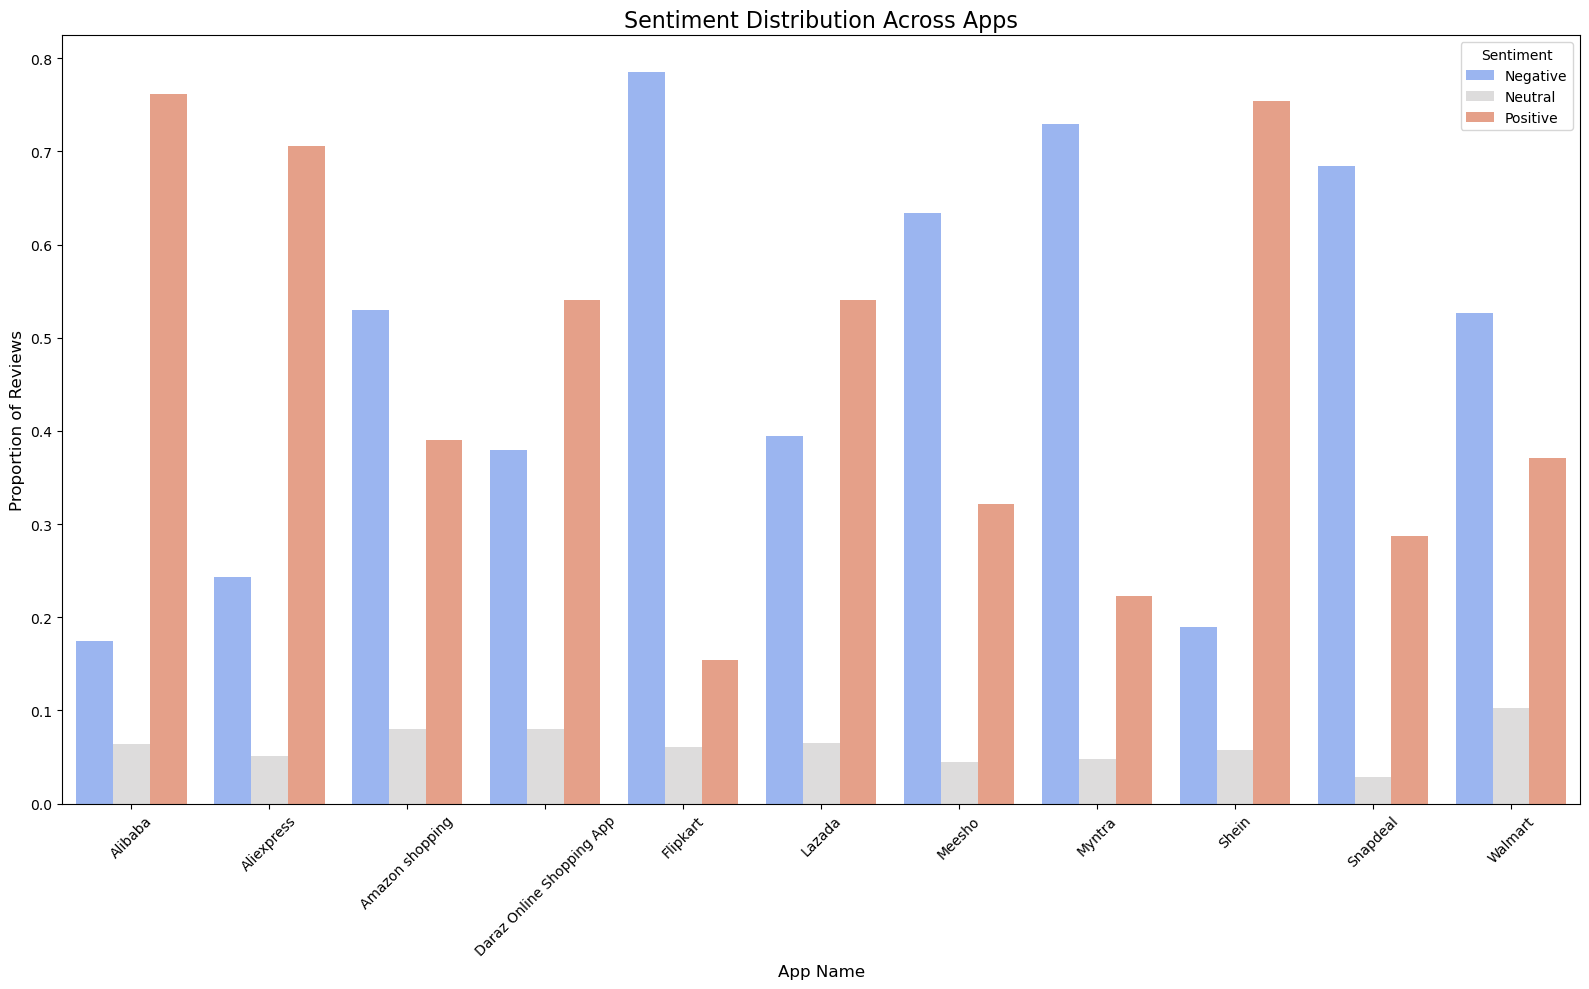

In [55]:
# Define sentiment labels
def categorize_sentiment(score):
    if score >= 4:
        return 'Positive'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Negative'

# Apply sentiment categorization
combined_df['sentiment'] = combined_df['score'].apply(categorize_sentiment)

# Count sentiments per app
sentiment_counts = (
    combined_df.groupby(['appName', 'sentiment'])
    .size()
    .reset_index(name='count')  # Reset index to get 'count' as a column
)

# Calculate proportions per app
sentiment_counts['proportion'] = sentiment_counts.groupby('appName')['count'].transform(lambda x: x / x.sum())

# Plotting
plt.figure(figsize=(16, 10))
sns.barplot(data=sentiment_counts, x='appName', y='proportion', hue='sentiment', palette='coolwarm')
plt.title('Sentiment Distribution Across Apps', fontsize=16)
plt.xlabel('App Name', fontsize=12)
plt.ylabel('Proportion of Reviews', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Sentiment', loc='upper right')
plt.tight_layout()
plt.show()

In [57]:
# Calculate the percentage of positive reviews per app
app_performance = combined_df.groupby('appName')['sentiment'].apply(lambda x: (x == 'positive').mean() * 100).reset_index(name='positive_percentage')

# Identify top 3 apps with the highest percentage of positive reviews
top_apps = app_performance.sort_values('positive_percentage', ascending=False).head(3)['appName'].values
print("Top Performing Apps:", top_apps)

# Extract reviews for these top apps
top_apps_reviews = combined_df[combined_df['appName'].isin(top_apps)]

# Group by app name and sentiment to analyze trends
top_app_trends = top_apps_reviews.groupby(['appName', 'sentiment']).size().unstack(fill_value=0)
print(top_app_trends)

Top Performing Apps: ['Alibaba' 'Aliexpress' 'Amazon shopping']
sentiment        Negative  Neutral  Positive
appName                                     
Alibaba             16457     6038     72005
Aliexpress          30666     6365     88968
Amazon shopping     52449     7912     38639


Dynamic Sentiment Analysis

In [59]:
pip install nltk vaderSentiment

Note: you may need to restart the kernel to use updated packages.


Sentiment Analysis with VADER

In [61]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to classify sentiment based on VADER scores
def classify_sentiment(review):
    sentiment_score = analyzer.polarity_scores(review)
    compound_score = sentiment_score['compound']
    
    # Classify sentiment based on compound score
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment classification to the review content
combined_df['sentiment'] = combined_df['content'].apply(classify_sentiment)

In [62]:
#Review the output
combined_df[['content', 'sentiment']].head()

content sentiment
0  Trying to use the on website is almost impossi...  Negative
1  Had to uninstall due to the amount of notifica...  Negative
2  I order and it takes too long the shpping days...  Negative
3  Buyer beware! They have tons of listings that ...  Negative
4  It's all around a great app except for the fac...  Positive

Clustering Apps Based on Review Characteristics 

In [65]:
sentiment_map = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
combined_df['sentiment_num'] = combined_df['sentiment'].map(sentiment_map)

Select features for clustering

In [67]:
# Create 'review_length' column based on the length of each review
combined_df['review_length'] = combined_df['content'].apply(len)

if 'sentiment_num' not in combined_df.columns:
    sentiment_mapping = {'positive': 1, 'negative': -1, 'neutral': 0}
    combined_df['sentiment_num'] = combined_df['sentiment'].map(sentiment_mapping)

# Now you can extract 'review_length' and 'sentiment_num' for analysis
X = combined_df[['review_length', 'sentiment_num']]

# Preview the result
print(X.head())

   review_length  sentiment_num
0            362             -1
1            369             -1
2            499             -1
3            494             -1
4            401              1


Normalize the features 

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

K-Means clustering 

In [71]:
from sklearn.cluster import KMeans

# Choose the number of clusters (e.g., 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
combined_df['cluster'] = kmeans.fit_predict(X_scaled)

Review cluster results

In [73]:
combined_df[['appName', 'review_length', 'sentiment', 'cluster']].head()

appName  review_length sentiment  cluster
0  Alibaba            362  Negative        2
1  Alibaba            369  Negative        2
2  Alibaba            499  Negative        2
3  Alibaba            494  Negative        2
4  Alibaba            401  Positive        2

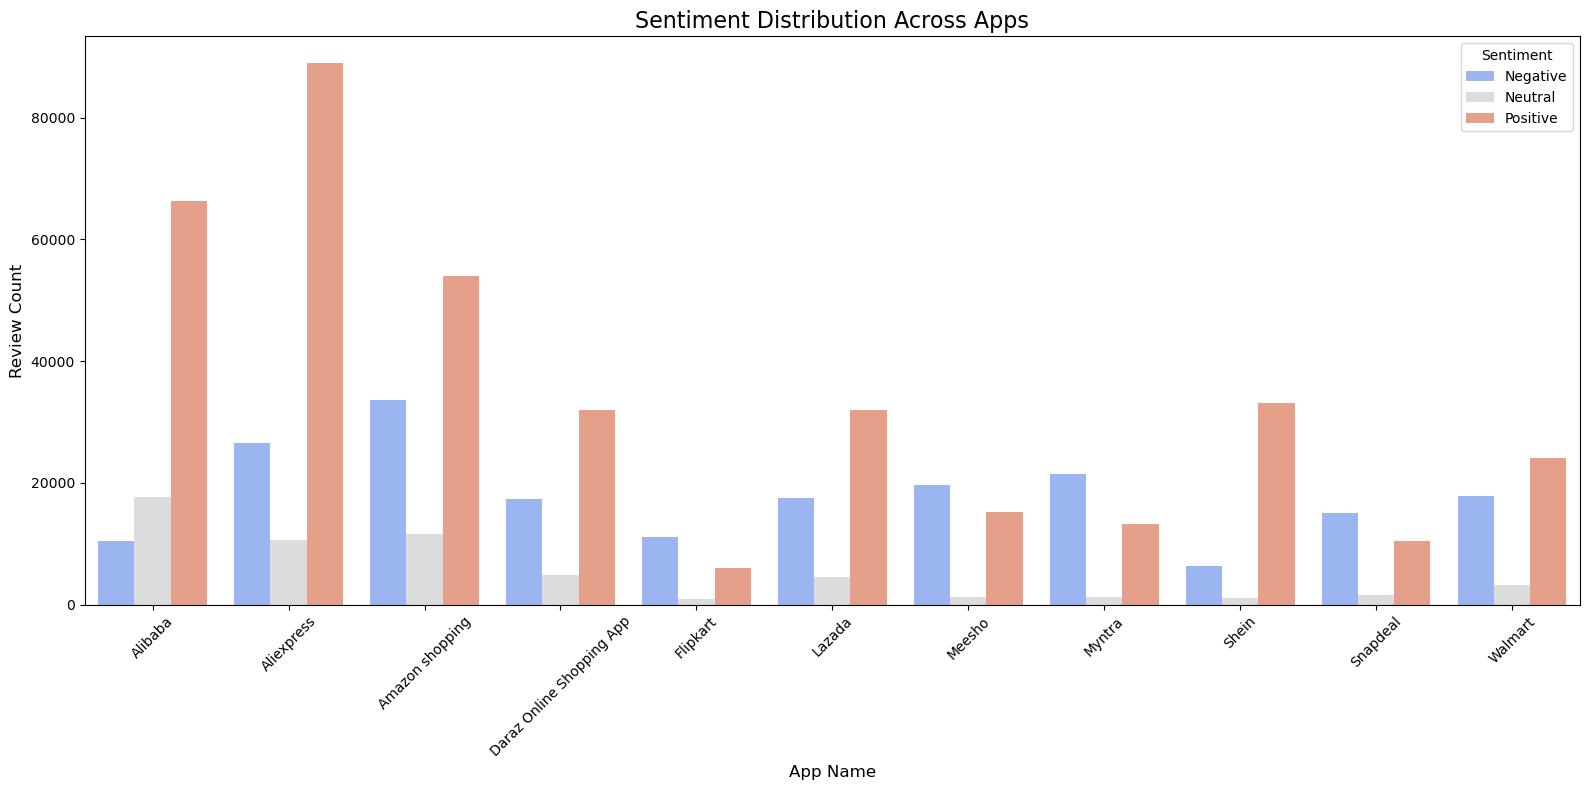

In [75]:
# Aggregate sentiment counts per app
sentiment_counts = combined_df.groupby(['appName', 'sentiment']).size().reset_index(name='count')

# Plotting
plt.figure(figsize=(16, 8))
sns.barplot(data=sentiment_counts, x='appName', y='count', hue='sentiment', palette='coolwarm')

# Customizing the plot
plt.title('Sentiment Distribution Across Apps', fontsize=16)
plt.xlabel('App Name', fontsize=12)
plt.ylabel('Review Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Sentiment', loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()

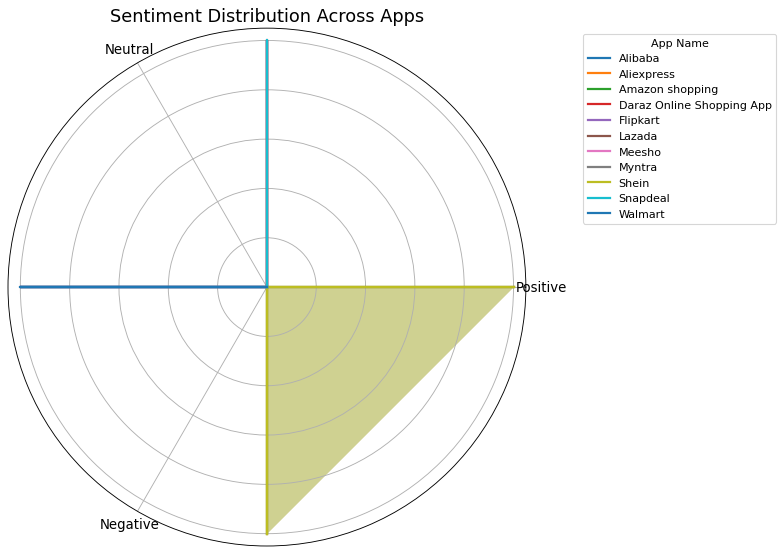

In [77]:
data = {
    'appName': ['Alibaba', 'Aliexpress', 'Daraz Online Shopping App', 'Myntra', 'Lazada', 'Amazon shopping', 'Flipkart', 'Meesho', 'Walmart', 'Shein', 'Snapdeal'],
    'sentiment': ['Positive', 'Negative', 'Neutral', 'Positive', 'Neutral', 'Negative', 'Positive', 'Neutral', 'Positive', 'Negative', 'Neutral'],
    'count': [100, 50, 30, 200, 40, 150, 120, 180, 90, 170, 60]
}

# Creating a DataFrame from the corrected sample data
combined_df = pd.DataFrame(data)

# Create a pivot table to get the sentiment counts for each app
sentiment_counts = combined_df.pivot_table(index='appName', columns='sentiment', values='count', aggfunc='sum', fill_value=0)

# Normalize the data if needed (you can skip this step if not required)
sentiment_counts_norm = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0)

# Number of categories (sentiments)
categories = ['Positive', 'Neutral', 'Negative']
categories_idx = np.arange(len(categories))

# Set up the figure
fig, ax = plt.subplots(figsize=(10, 10), dpi=80, subplot_kw=dict(polar=True))

# Angle for each category (sentiment)
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()

# Loop through each app and plot its sentiment distribution
for app in sentiment_counts_norm.index:
    values = sentiment_counts_norm.loc[app].tolist()
    values += values[:1]  # Closing the loop (add the first value again at the end)
    
    # Adjust angles to match the new length
    angles_extended = np.linspace(0, 2 * np.pi, len(values), endpoint=False).tolist()  # 4 angles
    
    ax.plot(angles_extended, values, label=app, linewidth=2, linestyle='solid')
    ax.fill(angles_extended, values, alpha=0.2)

# Adjust plot settings
ax.set_yticklabels([])  # Hide radial ticks
ax.set_xticks(angles)  # Set the ticks to the original categories
ax.set_xticklabels(categories, fontsize=12)

# Title
plt.title('Sentiment Distribution Across Apps', fontsize=16)

# Add legend outside of the plot
plt.legend(title='App Name', bbox_to_anchor=(1.1, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()
